Persona 52 infectada en t=0
Persona 74 infectada en t=0
Persona 12 infectada en t=0
Persona 44 infectada en t=0
Persona 34 infectada en t=0
Persona 83 infectada en t=1
Persona 60 infectada en t=1
Persona 33 infectada en t=1
Persona 76 infectada en t=1
Persona 39 infectada en t=1
Persona 97 infectada en t=1
Persona 3 infectada en t=1
Persona 48 infectada en t=1
Persona 94 infectada en t=1
Persona 73 infectada en t=1
Persona 15 infectada en t=1
Persona 5 infectada en t=1
Persona 46 infectada en t=2
Persona 47 infectada en t=2
Persona 20 infectada en t=2
Persona 27 infectada en t=2
Persona 7 infectada en t=2
Persona 49 infectada en t=2
Persona 32 infectada en t=2
Persona 82 infectada en t=2
Persona 8 infectada en t=2
Persona 87 infectada en t=2
Persona 63 infectada en t=2
Persona 29 infectada en t=2
Persona 16 infectada en t=2
Persona 18 infectada en t=2
Persona 37 infectada en t=2
Persona 10 infectada en t=2
Persona 22 infectada en t=2
Persona 1 infectada en t=2
Persona 53 infectada en t

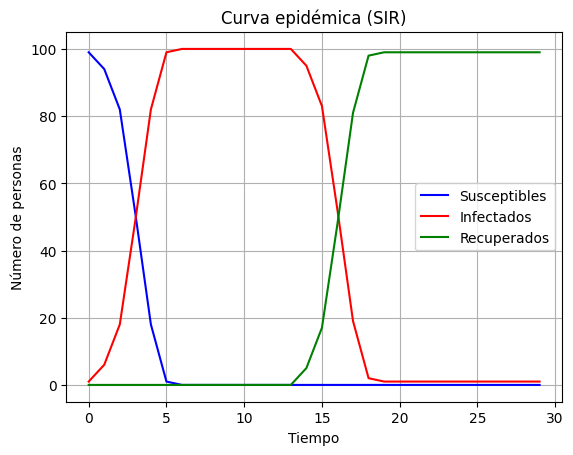

In [5]:
import simpy
import random
import matplotlib.pyplot as plt


class Persona:
    def __init__(self, env, id, estado_inicial="S"):
        self.env = env
        self.id = id
        self.estado = estado_inicial

    def infectar(self):
        if self.estado == "S" and random.random() < 0.3:  # 30% de probabilidad
            self.estado = "I"
            print(f"Persona {self.id} infectada en t={self.env.now}")
            yield self.env.timeout(14)  # Tiempo de recuperación
            self.estado = "R"


def simulacion(env, num_personas=100, duracion=30):
    personas = [Persona(env, i) for i in range(num_personas)]
    personas[0].estado = "I"  # Paciente cero

    # Listas para guardar la curva epidémica
    tiempos = []
    susceptibles = []
    infectados = []
    recuperados = []

    while env.now < duracion:
        for persona in personas:
            if persona.estado == "I":
                vecinos = random.sample(personas, 5)
                for vecino in vecinos:
                    env.process(vecino.infectar())

        # Contar estados
        s = sum(1 for p in personas if p.estado == "S")
        i = sum(1 for p in personas if p.estado == "I")
        r = sum(1 for p in personas if p.estado == "R")

        tiempos.append(env.now)
        susceptibles.append(s)
        infectados.append(i)
        recuperados.append(r)

        yield env.timeout(1)

    # Al terminar, graficar la curva epidémica
    plt.plot(tiempos, susceptibles, label="Susceptibles", color="blue")
    plt.plot(tiempos, infectados, label="Infectados", color="red")
    plt.plot(tiempos, recuperados, label="Recuperados", color="green")
    plt.xlabel("Tiempo")
    plt.ylabel("Número de personas")
    plt.title("Curva epidémica (SIR)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Ejecutar simulación
env = simpy.Environment()
env.process(simulacion(env))
env.run()
